# Dataset and Research

## Dataset
The dataset titled "Letter Recognition Data Set" contains 20,000 instances of distorted uppercase English letters from 20 different fonts. The dataset has 17 features, consisting of 1 categorical string value and 16 numerical values, which describe the pixel image of each letter instance. Such features include: width & height of the box, vert. and horiz. position of the box, number of 'on' pixels (like in a binary image), etc.

I chose this dataset because it is related to types of machine learning problems that are becoming increasingly more prevalent nowadays. Examples of problems include identifying symbols in engineering blueprints or identifing vehicles in traffic camera footage.

The purpose of this study is to use this data to build a predictive model capable of discerning letters from a given set of features.

### Source
Obtained from the UCI repository at https://archive.ics.uci.edu/ml/datasets/Letter+Recognition (accessed 22th Oct, 2021).

## Literature Review
To gain insight into an actual machine learning problem, I selected a peer-reviewed paper to discuss. This paper is relevant because it tackles a similar classification problem of letter identification. I had originally intended to review the [**original paper**](https://link.springer.com/article/10.1007/BF00114162) the dataset was constructed for; however, the techniques present within are long out of date since being published in 1991.

### Review
B. B. Yousif et al in “Toward an ONKM-AVLPR” present a more effective methodology of license plate recognition. The authors describe each step of their new method and compare their results with those of older methods in order to prove the method’s effectiveness. The main motivation for developing a new method was to overcome a challenge faced by previous methods: image degradations. Degradations included shadows on the license plate or faded or otherwise unclear lettering and tended to affect the overall performance (accuracy) of the results. The data used in this study comprise photographs of Egyptian and Croatian license plates taken under different lighting conditions.

The method firstly preprocesses the images in order to locate the license plate and improve overall performance. Preprocessing operations include resizing, greyscaling and contrasting. Following this, a neutrosophic set algorithm is used to reduce indeterminacy in the data and is optimised with a genetic algorithm to improve accuracy. Next, a k-means algorithm is used to cluster the data. Then, connected-components labeling analysis takes place to label the characters. Finally, statistical cross correlation is used to match the characters against templates in a database. The authors provide flowcharts to give a high-level overview of each algorithm. They also use tables of images to illustrate how an image evolves through each step of the method.

The authors provide tables of performance metrics to show how different factors affect accuracy. One important factor was optimising the neutrosophic set as it improved the results tremendously when applied. Afterwards, the authors do a comparative study, highlighting the differences between their method’s output to those of older methods. For example, older methods produced grainy images and some failed completely to locate characters. The comparison demonstrates the new method is most effective.

The paper is quite technical, as it predominantly speaks in jargon. The use of flowcharts and tables aid understanding and are nicely presented tables. They clearly evidenced their method to be more performant than older methods of recognition. Overall, it is well made and very accessible.

### Citation
B. B. Yousif, M. M. Ata, N. Fawzy and M. Obaya, "Toward an Optimized Neutrosophic k-Means With Genetic Algorithm for Automatic Vehicle License Plate Recognition (ONKM-AVLPR)," in IEEE Access, vol. 8, pp. 49285-49312, 2020, doi: 10.1109/ACCESS.2020.2979185.

Obtained from https://ieeexplore.ieee.org/document/9027882 (accessed 23rd Oct, 2021).

## Data Exploration
It is important to explore our data to gain a better insight into it, which helps us later in the preprocessing stage.

### Load Libraries and Data

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('data/letter-recognition.csv')

In [2]:
# Print some rows
df.head(4)

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8


### Data Size and Feature Types
We can get a basic overview of the dataset with the following:

In [3]:
# Print dimensions
print(f'Rows: {df.shape[0]}\tColumns: {df.shape[1]}')

# Show data types
df.dtypes

Rows: 20000	Columns: 17


lettr    object
x-box     int64
y-box     int64
width     int64
high      int64
onpix     int64
x-bar     int64
y-bar     int64
x2bar     int64
y2bar     int64
xybar     int64
x2ybr     int64
xy2br     int64
x-ege     int64
xegvy     int64
y-ege     int64
yegvx     int64
dtype: object

Listed above are the name and type of each feature. The features consist of 1 categorical value and 16 numerical values.

### Class Distribution
**lettr** is a categorical attribute that states which of the 26 letters an instance is describing. By getting the class distribution, we can assess the balance of this feature:

In [4]:
letters = df['lettr']
letters_dist = pd.DataFrame({ 'Count': letters.value_counts() }).sort_index()
proportions = []

for l in letters_dist['Count']:
    p = round(l / letters.shape[0] * 100, 2)
    proportions.append(p)

# Count unique values
unique = len(letters.unique())
print(f'There are **{unique}** different letters.')

letters_dist['Proportion'] = proportions
letters_dist.head(unique)

There are **26** different letters.


,Count,Proportion
A,789,3.94
B,766,3.83
C,736,3.68
D,805,4.03
E,768,3.84
F,775,3.88
G,773,3.86
H,734,3.67
I,755,3.77
J,747,3.74


In [5]:
print(f'Average proportion: {round(sum(proportions) / 26, 4)}%')
print(f'Actual proportion: {round(1/26*100, 4)}%')

Average proportion: 3.8458%
Actual proportion: 3.8462%


The above shows the count and proportions for each letter. Also, average and actual proportions have been calculated to check how balanced the dataset is. As we can see, the calculated average is about the same as the actual, suggesting the dataset is quite balanced. To further visualise this, we can use a barplot:

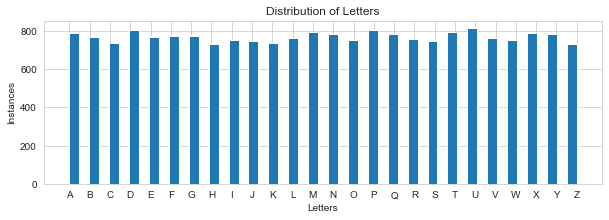

In [6]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(10,3))

plt.hist(letters.sort_values(0), bins=51)
plt.title('Distribution of Letters')
plt.xlabel('Letters')
plt.ylabel('Instances')

plt.show()

Again, we can see the distribution is quite balanced. Having an imbalance means a model trained on that data would become lopsided and likely make mistakes in its predictions, due to the underrepresentation of some letters. Therefore, having a balanced dataset means a model would learn each letter fairly equally, improving its performance.

### Missing Values
We can check for gaps in our data with the following:

In [7]:
df.isnull().sum()

lettr    0
x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

The output shows zero for each feature, meaning there are no missing values.

### Outliers and Correlations
It is possible that some data is drastically different. We can get a statistical overview of the data with the following:

In [8]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


The above shows a consistently low standard deviation, suggesting the data is clustered fairly closely around the mean. Also note that the min and max values are 0 and 15 across all columns.

We can display some of these features as graphs:

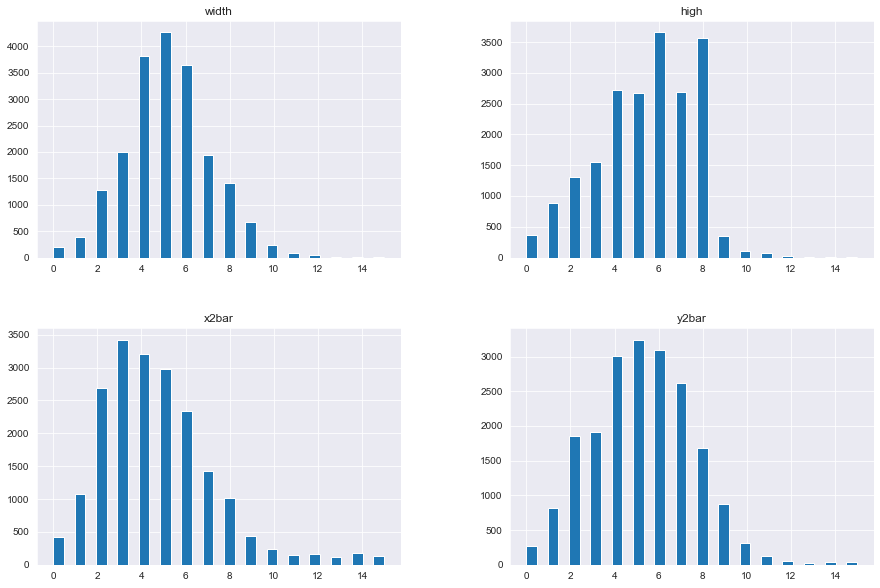

In [9]:
sns.set_style(style='darkgrid')

# Select specific columns
columns = ['width', 'high', 'x2bar', 'y2bar']
selection = df[columns]

selection.hist(bins=31,figsize=(15,10))
plt.show()

Plotted above are the width, height, x2bar and y2bar. The x2bar is defined as the mean x variance and the y2bar as the mean y variance. When we pair the x2bar with the width and the y2bar with the height (labeled high), we can see two very similar pairs of graphs, suggesting a correlation between them.

The x2bar suggests that wider letters have more variance and vice versa. Similarly, y2bar suggests taller letters have more variance.

We can calculate the correlations between these columns:

In [10]:
selection.corr()[columns]

,width,high,x2bar,y2bar
width,1.000000,0.660215,-0.098611,0.057074
high,0.660215,1.000000,0.082383,0.059032
x2bar,-0.098611,0.082383,1.000000,-0.188431
y2bar,0.057074,0.059032,-0.188431,1.000000


## Data Preprocessing
In this stage, we will prepare our dataset for model training. As we learned from exploring the data, the dataset is fairly balanced and there is no missing data, meaning it is not necessary to take any extra steps to fix them.

Were there an imbalance, some form of data sampling would be required. Likewise, were there any missing data, we would need to use a technique like filling the gaps with the mean value.

### Split Features and Encode Labels
We firstly need to separate the input features from the target variable (or label). It is also good practice to encode our categorical labels into integer values.

In [11]:
# Store input features
# Using numpy array is better (also to match label format)
X = np.array(df.drop('lettr', axis=1))

# Store & Encode Labels
Y = df['lettr']
Y = LabelEncoder().fit(Y).transform(Y) # returns numpy array

# Show encoded values:
print(f'Before: {np.array(df["lettr"][:8])}')
print(f'After:  {Y[:8]}')

Before: ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A']
After:  [19  8  3 13  6 18  1  0]


### Test and Train Data
Next, we need to divide our dataset into training and test sets. `train_size` has been set to use 80% of the total instances (16,000 rows) for training.

We also set the random state to control the randomness.

In [12]:
# Random state
r_state = 20

# Get our test and train data
X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=.8, random_state=r_state)

### Normalisation
In order to reduce noise, we can use min-max normalisation to scale the numerical values down to a range of 0 to 1. As noted earlier, the input features have common min and max values (0 and 15), so normalisation is simple:

In [13]:
X_train = X_train / 15.0
X_test = X_test / 15.0

# Classification

For this study, I have chosen to use a Random Forests model. Random Forests make classifications by selecting the most frequent class from an ensemble of decision trees. Given the variety of features in my dataset, I believe this type of model is befitting and would yield accurate results because it would classify a letter based on multiple decisions.

## Model
### Build and Train

We will use the `RandomForestClassifier` class provided by scikit-learn.

We specify the number of trees with `n_estimators`. We'll set a reasonable value to begin with and see how the model performs. Next, the number of features to consider is defined by `max_features`. Setting this to `None` uses the number of features available (i.e. 16). Finally, we control the randomness with `random_state`, allowing us to produce consistent results. We'll simply resuse the `r_state` value set earlier.

After the instance is created, we'll train our model by fitting the **X_train** and **Y_train** sets created earlier.

In [14]:
model = RandomForestClassifier(n_estimators=150, max_features=None, random_state=r_state)
model.fit(X_train, Y_train)

RandomForestClassifier(max_features=None, n_estimators=150, random_state=20)

### Make Predictions
Once trained, we can use the model to make predictions. The following code shows our model making class predictions on the **X_test** set. It also predicts the class probabilities for the same set.

In [15]:
# Predictions & Probabilities
prediction = model.predict(X_test)
probability = model.predict_proba(X_test)

In [16]:
print(f'Probabilities for 1st instance:')
probability[:1]

Probabilities for 1st instance:


array([[0.        , 0.        , 0.01333333, 0.        , 0.        ,
        0.        , 0.00666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.96      ,
        0.00666667, 0.        , 0.        , 0.        , 0.        ,
        0.01333333, 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

## Model Evaluation
The `sklearn.metrics` module provides functions to evaluate our model's quality of performance, such as calculating metrics and printing reports. Reviewing these will inform us if there is any fine tuning to be done to the model.

### Accuracy
We can use accuracy_score to calculate the accuracy of the model's results:

In [17]:
model_accuracy = accuracy_score(Y_test, prediction)
print(f'End result accuracy score is: {np.round(model_accuracy * 100, 2)}%')

End result accuracy score is: 93.42%


As shown, the model, with its current settings, performs with more than 93% accuracy. This could be due to the number of estimators (decision trees) we set, or it could be the number of rows given to train the model.

### Classification Report
We can build a classification report to see exactly how the model performed for each letter. This report displays the precision, recall and f1-score for each class label.

Note the indices of 0–25 are the encoded labels for A–Z.

In [18]:
# Create Report & Wrap with DataFrame
report_dict = classification_report(Y_test, prediction, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

# Output report
report

,precision,recall,f1-score,support
0,0.974522,0.980769,0.977636,156.00000
1,0.894737,0.925170,0.909699,147.00000
2,0.948387,0.924528,0.936306,159.00000
3,0.894040,0.906040,0.900000,149.00000
4,0.928994,0.912791,0.920821,172.00000
5,0.906667,0.918919,0.912752,148.00000
6,0.955556,0.889655,0.921429,145.00000
7,0.856250,0.895425,0.875399,153.00000
8,0.952756,0.960317,0.956522,126.00000
9,0.965035,0.896104,0.929293,154.00000


This shows all classes with an f1-score of 90% or above. This tells us the model did not favour any classes in particular and made balanced predictions. If we recall the data exploration, this was expected due the balanced distribution.

However, some classes had a **precision** of less than 90%. We can display those classes:

In [19]:
# Decode indices back to letters
def decode(n):
    return chr(int(n)+65)

def decode_values(values):
    return [decode(n) for n in values]

# Grab precision < 90%
less_than_90 = report[report['precision'] < 0.9]

# Output
print(f'Labels (order of appearance):  {decode_values(list(less_than_90.index.values))}')
less_than_90

Labels (order of appearance):  ['B', 'D', 'H', 'O']


,precision,recall,f1-score,support
1,0.894737,0.925170,0.909699,147.0
3,0.894040,0.906040,0.900000,149.0
7,0.856250,0.895425,0.875399,153.0
14,0.893750,0.922581,0.907937,155.0


Above shows the values for the letters B, D, H and O. The lowest value was H with 0.85.

### Misclassifications
We can also manually check which instances the model failed to make a correct classification on:

In [20]:
results = pd.DataFrame({ 'predicted': prediction, 'actual': Y_test })
# results['probability'] = probability
incorrect = results[results.predicted != results.actual]

print(f'Misclassified **{incorrect.shape[0]}** instances ({round(incorrect.shape[0]/df.shape[0] * 100, 2)}% error)')
incorrect.head()

Misclassified **263** instances (1.31% error)


,predicted,actual
23,12,20
58,20,9
82,17,10
91,3,10
103,7,23


Furthermore, we can list the most frequent miscounts:

In [21]:
# Count incorrect instances
miscounts = pd.DataFrame(incorrect.groupby(['predicted', 'actual']).size()).reset_index()

# Rename columns, sort df and slice top 10 rows
miscounts.columns = ['predicted', 'actual', 'count']
miscounts = miscounts.sort_values('count', ascending=False)[:10]

# Decode each letter and show count
for index, row in miscounts.iterrows():
    print(f'`{decode(row[0])}` was mistaken for `{decode(row[1])}` {row[2]} times')

`O` was mistaken for `Q` 6 times
`H` was mistaken for `D` 6 times
`H` was mistaken for `K` 5 times
`F` was mistaken for `P` 5 times
`R` was mistaken for `H` 5 times
`P` was mistaken for `F` 5 times
`D` was mistaken for `H` 4 times
`C` was mistaken for `G` 4 times
`V` was mistaken for `B` 4 times
`T` was mistaken for `Y` 3 times


The above shows the model frequently mistakes `O` with `Q` which is understandable because they are very similar in shape. Other examples of similar shapes include:
- `P` with `F`
- `F` with `P`
- `C` with `G`
- `T` with `Y`

Naturally, across these instances, there are some pairs, where the model mistakes a letter for another specific letter and vice versa, as is the case with `H` and `D` as well as `P` and `F`.

### Importance
To get more insight into the model's decision-making, we can calculate the importance of each feature:

In [22]:
feature_importances = []
features = list(df.columns)[1:] # drop the first value since label is unimportant

for feature, score in zip(features, model.feature_importances_):
    feature_importances.append({ 'feature': feature, 'importance': score })

# Sort by importance
pd.DataFrame(feature_importances).sort_values('importance', ascending=False)

,feature,importance
12,x-ege,0.136424
14,y-ege,0.112096
8,y2bar,0.109859
13,xegvy,0.097744
11,xy2br,0.086163
10,x2ybr,0.080300
9,xybar,0.071428
7,x2bar,0.069406
6,y-bar,0.058311
15,yegvx,0.056154


The table shows that among the least important values are width, height. This is interesting because in most fonts some letters are wider than others - compare W with I - with the obvious exception being monospaced fonts. This perhaps gives some insight into how the distortions affected the letters.

On the other hand, the two most important features are x-ege and y-ege, which are the horizontal and vertical mean edge counts respectively. This makes sense because if you compare the letters `E` and `L`, `E` has a higher vertical edge count than `L`. Likewise compare `I` with `W` for horizontal edge count.

# Solution Comparison
Our model achieved a very high accuracy result but it would be interesting to see how other models would compare. In this section, we will experiment with a variety of models to see how different input parameters affect the performance of the model.

Note the same `random_state` value will be used across all experiments to maintain consistency.

## Parameter Tweaking
In this experiment, we will observe the effects of tweaking some parameters of the random forest function. The main parameters are `n_estimators`, `max_features` and `random_state`, although the `random_state` will be constant to ensure reproducibility.

Several tests will be run:
1. Use 50 trees instead of 150
2. Use 4 features (quarter features)
3. Use 300 trees instead of 150
3. Use 8 features (half of features)

The following code will run these three tests consecutively, storing each resulting accuracy in a list to be evalutated afterwards:

In [23]:
r_state = 20

def print_results(lst):
    for result in lst:
        print(f"{result['name']} \t {round(result['accuracy']*100, 2)}% ")

In [24]:
# Contain within function to avoid affecting previous results
def experiment_parameter_tweaking():
    results = [
        { 'name': 'Original Test', 'accuracy': model_accuracy }
    ]

    tests = [
        RandomForestClassifier(n_estimators=50,  max_features=None, random_state=r_state),
        RandomForestClassifier(n_estimators=150, max_features=4,    random_state=r_state),
        RandomForestClassifier(n_estimators=300, max_features=None, random_state=r_state),
        RandomForestClassifier(n_estimators=150, max_features=8,    random_state=r_state),
    ]

    # Split sets & normalise
    X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=.8, random_state=r_state)
    X_train = X_train / 15.0 ; X_test = X_test / 15.0

    # Run tests
    index = 1
    for test in tests:
        # Fit model
        test.fit(X_train, Y_train)

        # Prediction
        yhat = test.predict(X_test)
        acc  = accuracy_score(Y_test, yhat)

        # Store prediction
        results.append({ 'name': f'Test {index}', 'accuracy': acc })
        index += 1

    # Print
    print_results(results)

experiment_parameter_tweaking()

Original Test 	 93.42% 
Test 1 	 93.72% 
Test 2 	 96.68% 
Test 3 	 93.52% 
Test 4 	 96.3% 


All tests achieved a higher accuracy than the original model. The two best results are from test 2 and 4, where the primary change was the `max_feature`. Test 2 set a value of 4 which yielded the best result, showing that less features squeezes a little more performance out.

Tests 1 and 3 changed the `n_estimators` and, interestingly, setting a lower value yielded a better result. This suggests that having more estimators makes the model slightly more prone to misclassifications.

## Partitioning
For the initial model, the train_test_split method used a value of 0.8 for the `train_size` parameter. This means there was a 80/20 divide on training and testing sets. For this experiment, a range of values from 0.5 to 0.7 will be testsed - i.e. 50–70%. The original settings are the same (estimators and max features).

In [25]:
def experiment_partitioning(X, Y):
    results = [
        { 'name': 'Original Test', 'accuracy': model_accuracy }
    ]

    exp_model = RandomForestClassifier(n_estimators=150, max_features=None, random_state=r_state)

    sizes = [0.7, 0.6, 0.5]

    for size in sizes:
        # Split sets & normalise
        X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=size, random_state=r_state)
        X_train = X_train / 15.0 ; X_test = X_test / 15.0

        # Fit model
        exp_model.fit(X_train, Y_train)

        # Make prediction
        yhat = exp_model.predict(X_test)
        acc = accuracy_score(Y_test, yhat)
        results.append({ 'name': 'Partition test', 'accuracy': acc })

    # Print
    print_results(results)

experiment_partitioning(X, Y)

Original Test 	 93.42% 
Partition test 	 93.63% 
Partition test 	 93.48% 
Partition test 	 92.48% 


As expected, the 50/50 split has the lowest accuracy with 92.48%. However, interestingly, the 60/40 and 70/30 divisions have a greater accuracy than the 80/20. We would have expected them to be lower, since 80/20 receives more training. This could be because the extra instances used in training are noisier, slightly hurting the model's performance (in the case of 80/20).

## Cross Validation
Cross validation will allow us to further evaluate how a model performs on this dataset.

A random forest model with default parameters (besides `random_state`) will be used in a 10-fold cross validation.

In [26]:
def cross_val():
    # Model and KFold model
    exp_model = RandomForestClassifier(random_state=r_state)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=r_state)
    
    # Calculate scores
    scores = cross_val_score(exp_model, X, Y, cv=cv, scoring='accuracy')
    return np.mean(scores)

scores = cross_val()
print(f'Cross validation accuracy: {round(scores*100,2)}%')

Cross validation accuracy: 96.63%


# Conclusion
The models in all tests consistently produce high results of +93% accuracy and by varying some factors the model achieved close to 97%. This clearly shows how well the models learn the dataset. The cross validation also suggests that any new data (such as new characters of other alphabets) would be learned accurately as well.